In [20]:
import os
import math
import numpy as np
import time
from PIL import Image
import fnmatch
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mod3
plt.rcParams.update({'figure.figsize': (5.0, 4.0), 'lines.linewidth': 2.0})

In [6]:
label_counter = 0
index = 0

tst_images = []
categ_labels = np.zeros(shape=80)
bllvl_labels = np.zeros(shape=80)
fn_pattern = ''
B = np.zeros(shape=(80, 32, 32, 3))


for subdir, dirs, files in os.walk('C:\\Users\\laptomon\\Documents\\fmri_data_temp\\imgs\\blur\\ImgSet170114'):
    for folder in dirs:
        for folder_subdir, folder_dirs, folder_files in os.walk(os.path.join(subdir, folder)):
            for bllvl in range(4):
                fn_pattern = '*' + str(bllvl) + '.jpg'
                for fn in fnmatch.filter(folder_files, fn_pattern):
#                     print(fn)
                    tst_images.append(os.path.join(folder_subdir, fn))
                    img = load_img(os.path.join(folder_subdir, fn),target_size=(32, 32))
                    B[index] = img_to_array(img)
                    B[index] /= 255
#                     print(label_counter)
                    categ_labels[index] = label_counter
#                     print(label_counter)
                    bllvl_labels[index] = bllvl
                    index = index + 1
                    

#         print(label_counter)
        label_counter = label_counter + 1


print(len(tst_images))
print(categ_labels)
print(len(bllvl_labels))
print(B.shape)

80
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.]
80
(80, 32, 32, 3)


In [3]:
hf = h5py.File('blurred_images_180713.h5', 'w')
hf.create_dataset('images', data=B)
hf.create_dataset('blur_lvl', data=bllvl_labels)
hf.create_dataset('category', data=categ_labels)
hf.close()

In [7]:
from keras.models import Model, load_model
ff_model = load_model('cifar_feedforward_180711.h5');
rcs_model = load_model('cifar_recurrentsimple_180713.h5');
rcc_model = load_model('cifar_recurrentcomplex_180712.h5');
tdc_model = load_model('cifar_rectopdowncomplex_180716.h5');
tds_model = load_model('cifar_rectopdownsimple_180717.h5');



c:\users\laptomon\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:305: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [8]:
import keras
n_out = 10
oldlab = categ_labels.copy()
print(oldlab)
categ_labels[oldlab == 1] = 2
categ_labels[oldlab == 2] = 1
categ_labels[oldlab == 4] = 5
# print(categ_labels)
# print(tst_images)
labels_test = keras.utils.to_categorical(categ_labels, n_out)
# print(labels_test)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.]


In [30]:
B1 = B[bllvl_labels == 1]
print(B1.shape)

labels_test1 = labels_test[bllvl_labels == 1]
evaluation = ff_model.evaluate(B1, labels_test1, verbose=0)

    
print('\n[Model evaluation]')
print( format(np.mean(evaluation[0]), '.4f'))
print( format(np.mean(evaluation[1]), '.4f'))

(20, 32, 32, 3)

[Model evaluation]
0.9651
0.6000


In [15]:
evaluation = rcs_model.evaluate(B1, labels_test1, verbose=0)

    
print('\n[Model evaluation]')
print( format(np.mean(evaluation[0]), '.4f'))
print( format(np.mean(evaluation[1]), '.4f'))


[Model evaluation]
1.4192
0.5500


In [16]:
evaluation = rcc_model.evaluate(B1, labels_test1, verbose=0)

    
print('\n[Model evaluation]')
print( format(np.mean(evaluation[0]), '.4f'))
print( format(np.mean(evaluation[1]), '.4f'))


[Model evaluation]
2.9152
0.2500


In [17]:
evaluation = tdc_model.evaluate(B1, labels_test1, verbose=0)

    
print('\n[Model evaluation]')
print( format(np.mean(evaluation[0]), '.4f'))
print( format(np.mean(evaluation[1]), '.4f'))


[Model evaluation]
1.4567
0.4500


In [18]:
evaluation = tds_model.evaluate(B1, labels_test1, verbose=0)

    
print('\n[Model evaluation]')
print( format(np.mean(evaluation[0]), '.4f'))
print( format(np.mean(evaluation[1]), '.4f'))


[Model evaluation]
1.4890
0.4000


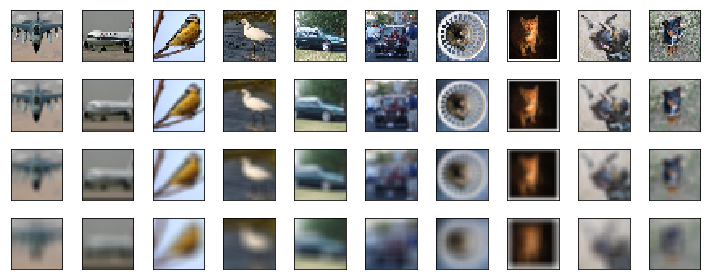

In [42]:
# select n_show samples randomly
plt.figure(figsize=(10, 4))
for bl in range(4):
    n_show = 10
    B1 = B[bllvl_labels == bl]
    selected = np.arange(0,20,2)
    categ_labels1 = categ_labels[bllvl_labels == 0]
#     print(selected)
    # print(labels_test1[0])
#     print(categ_labels1[selected])
    # plot samples
    
    for idx, img in enumerate(B1[selected]):
        plt.subplot(4, n_show, bl*10+idx+1)
        plt.imshow(img, cmap=plt.cm.gray)
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [55]:
lossmat=np.zeros((5,4))
accmat=np.zeros((5,4))
for bl in range(4):
    B1 = B[bllvl_labels == bl]
    labels_test1 = labels_test[bllvl_labels == bl]
    evaluation = ff_model.evaluate(B1, labels_test1, verbose=0)
    accmat[0][bl] = evaluation[1]
    lossmat[0][bl] = evaluation[0]
    evaluation = rcs_model.evaluate(B1, labels_test1, verbose=0)
    accmat[1][bl] = evaluation[1]
    lossmat[1][bl] = evaluation[0]
    evaluation = rcc_model.evaluate(B1, labels_test1, verbose=0)
    accmat[2][bl] = evaluation[1]
    lossmat[2][bl] = evaluation[0]
    evaluation = tds_model.evaluate(B1, labels_test1, verbose=0)
    accmat[3][bl] = evaluation[1]
    lossmat[3][bl] = evaluation[0]
    evaluation = tdc_model.evaluate(B1, labels_test1, verbose=0)
    accmat[4][bl] = evaluation[1]
    lossmat[4][bl] = evaluation[0]

In [56]:
print (lossmat)

[[ 1.59894621  0.96506375  1.95081675  4.30406666]
 [ 1.41923177  1.01783144  1.36467862  3.55726433]
 [ 2.91517305  0.98996067  1.60360944  3.24591637]
 [ 1.48899937  1.11446452  1.57582068  2.89787674]
 [ 1.4566915   1.20562911  1.37665761  2.00057769]]


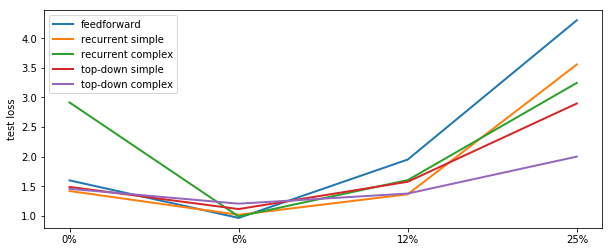

In [57]:
plt.figure(figsize=(10, 4))
plt.plot(lossmat[0], label='feedforward')
plt.plot(lossmat[1], label='recurrent simple')
plt.plot(lossmat[2], label='recurrent complex')
plt.plot(lossmat[3], label='top-down simple')
plt.plot(lossmat[4], label='top-down complex')
plt.xticks(np.arange(4), ('0%', '6%', '12%', '25%'))
plt.legend()
plt.ylabel('test loss')
plt.show()

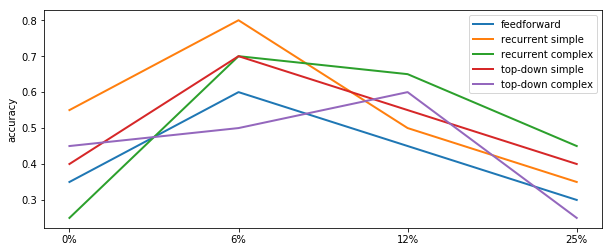

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(accmat[0], label='feedforward')
plt.plot(accmat[1], label='recurrent simple')
plt.plot(accmat[2], label='recurrent complex')
plt.plot(accmat[3], label='top-down simple')
plt.plot(accmat[4], label='top-down complex')
plt.xticks(np.arange(4), ('0%', '6%', '12%', '25%'))
plt.legend()
plt.ylabel('accuracy')
plt.show()